
<div class="elfjS" data-track-load="description_content"><p>You are given two positive integers <code>xCorner</code> and <code>yCorner</code>, and a 2D array <code>circles</code>, where <code>circles[i] = [x<sub>i</sub>, y<sub>i</sub>, r<sub>i</sub>]</code> denotes a circle with center at <code>(x<sub>i</sub>, y<sub>i</sub>)</code> and radius <code>r<sub>i</sub></code>.</p>

<p>There is a rectangle in the coordinate plane with its bottom left corner at the origin and top right corner at the coordinate <code>(xCorner, yCorner)</code>. You need to check whether there is a path from the bottom left corner to the top right corner such that the <strong>entire path</strong> lies inside the rectangle, <strong>does not</strong> touch or lie inside <strong>any</strong> circle, and touches the rectangle <strong>only</strong> at the two corners.</p>

<p>Return <code>true</code> if such a path exists, and <code>false</code> otherwise.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<div class="example-block">
<p><strong>Input:</strong> <span class="example-io">xCorner = 3, yCorner = 4, circles = [[2,1,1]]</span></p>

<p><strong>Output:</strong> <span class="example-io">true</span></p>

<p><strong>Explanation:</strong></p>

<p><img alt="" src="https://assets.leetcode.com/uploads/2024/05/18/example2circle1.png" style="width: 346px; height: 264px;"></p>

<p>The black curve shows a possible path between <code>(0, 0)</code> and <code>(3, 4)</code>.</p>
</div>

<p><strong class="example">Example 2:</strong></p>

<div class="example-block">
<p><strong>Input:</strong> <span class="example-io">xCorner = 3, yCorner = 3, circles = [[1,1,2]]</span></p>

<p><strong>Output:</strong> <span class="example-io">false</span></p>

<p><strong>Explanation:</strong></p>

<p><img alt="" src="https://assets.leetcode.com/uploads/2024/05/18/example1circle.png" style="width: 346px; height: 264px;"></p>

<p>No path exists from <code>(0, 0)</code> to <code>(3, 3)</code>.</p>
</div>

<p><strong class="example">Example 3:</strong></p>

<div class="example-block">
<p><strong>Input:</strong> <span class="example-io">xCorner = 3, yCorner = 3, circles = [[2,1,1],[1,2,1]]</span></p>

<p><strong>Output:</strong> <span class="example-io">false</span></p>

<p><strong>Explanation:</strong></p>

<p><img alt="" src="https://assets.leetcode.com/uploads/2024/05/18/example0circle.png" style="width: 346px; height: 264px;"></p>

<p>No path exists from <code>(0, 0)</code> to <code>(3, 3)</code>.</p>
</div>

<p><strong class="example">Example 4:</strong></p>

<div class="example-block">
<p><strong>Input:</strong> <span class="example-io">xCorner = 4, yCorner = 4, circles = [[5,5,1]]</span></p>

<p><strong>Output:</strong> <span class="example-io">true</span></p>

<p><strong>Explanation:</strong></p>

<p><img alt="" src="https://assets.leetcode.com/uploads/2024/08/04/rectangles.png" style="width: 346px; height: 264px;"></p>
</div>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>3 &lt;= xCorner, yCorner &lt;= 10<sup>9</sup></code></li>
	<li><code>1 &lt;= circles.length &lt;= 1000</code></li>
	<li><code>circles[i].length == 3</code></li>
	<li><code>1 &lt;= x<sub>i</sub>, y<sub>i</sub>, r<sub>i</sub> &lt;= 10<sup>9</sup></code></li>
</ul>
</div>


In [40]:
from enum import Enum
class Verbosity(Enum):
    FULL_VERBOSITY = 1
    VERBOSE_ON_FAIL = 2
    NO_VERBOSITY = 3

In [41]:
from typing import *
from math import sqrt
import itertools
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import numpy as np
verbosity_level = Verbosity.VERBOSE_ON_FAIL

test case 1: {'xCorner': 3, 'yCorner': 4, 'circles': [[2, 1, 1]]}
Returned: True, Expected: True
Passed:True

test case 2: {'xCorner': 3, 'yCorner': 3, 'circles': [[1, 1, 2]]}
Returned: False, Expected: False
Passed:True

test case 3: {'xCorner': 3, 'yCorner': 3, 'circles': [[2, 1, 1], [1, 2, 1]]}
Returned: False, Expected: False
Passed:True

test case 4: {'xCorner': 4, 'yCorner': 4, 'circles': [[5, 5, 1]]}
Returned: True, Expected: True
Passed:True

Planes (len 4) with parameters: [(1.0, 0.0, 0.0), (1.0, 0.0, -3.0), (0.0, -1.0, 0.0), (0.0, -1.0, 3.0)]
Membership Groups:
Circles:
i 0 | {0, 1, 3, 5}
i 1 | {0, 1, 3, 5}
Sides:
i 2 | {2}
i 3 | {0, 1, 3, 5}
i 4 | {4}
i 5 | {0, 1, 3, 5}


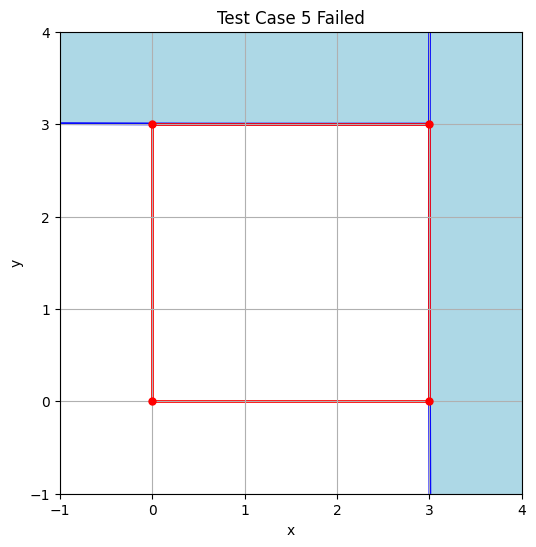

test case 5: {'xCorner': 3, 'yCorner': 3, 'circles': [[2, 1000, 997], [1000, 2, 997]]}
Returned: False, Expected: True
Passed:False

test case 6: {'xCorner': 15, 'yCorner': 15, 'circles': [[2, 20, 13], [20, 2, 13]]}
Returned: False, Expected: False
Passed:True



In [42]:

class Solution:

    def canReachCorner(self, xCorner: int, yCorner: int, circles: List[List[int]],
    verbose: bool = False) -> bool:

        n = len(circles)

        def _circlesTouch(c1: List[int], c2: List[int]) -> bool:
            x1, y1, r1 = c1
            x2, y2, r2 = c2
            center_dist = (x1 - x2)**2 + (y1 - y2)**2
            # if the sum of the radii is greater or equal to the distance
            # between the center of each circle, it must be that they touch
            # or intersect
            return (r1 + r2)**2 >= center_dist

        def _circleTouchesHyperplane(circle: List[int], planeIdx: int) -> bool:
            x, y, r = circle
            a, b, c = planes[planeIdx]
            # dist = abs((a*x + b*y + c) / sqrt(a**2 + b**2))
            dist = abs(a*x + b*y + c)
            pt1, pt2 = side_pts[planeIdx]
            if _circlesTouch(circle, (*pt1,0)) or _circlesTouch(circle, (*pt2,0)):
                # the circle intersects one of the corners of the line
                return True

            if planeIdx < 2:
                # this is a vertical side, i.e. left or right side
                in_range = pt1[1] <= y <= pt2[1]
            else:
                # this is a horizontal side, i.e. top or bottom side
                in_range = pt1[0] <= x <= pt2[0]

            # if the radius is greater or equal to the distance of the center of the circle
            # to the hyperplane, it must be that they touch or intersect
            return in_range and r >= dist

        def _calculateHyperplane(pt1: Tuple[int], pt2: Tuple[int]) -> Tuple[int]:
            # unpack the points
            x1, y1 = pt1
            x2, y2 = pt2
            # compute the hyperplane coefficients and offset
            a = y2 - y1
            b = x1 - x2
            c = -a*x1 - b*y1
            # normalize the hyperplane for a proper distance calculation
            norm_const = sqrt(a**2 + b**2)
            a /= norm_const
            b /= norm_const
            c /= norm_const
            return a, b, c

        # for each circle and each side, we will create a membership set
        groups = [{i} for i in range(n + 4)]

        # Points to form each side.
        # Notice that the the points in each pair are sorted in lexicographic order. This makes
        # the logic for checking if a point is in range easier in the `_calculateHyperplane` method.
        side_pts = [
            [(0,0), (0,yCorner)],
            [(xCorner,0), (xCorner,yCorner)],
            [(0,0),(xCorner,0)],
            [(0,yCorner), (xCorner,yCorner)],
        ]
        # plane equations for the left side, right side, bottom side, and top side
        planes = [_calculateHyperplane(*args) for args in side_pts]
        if verbose:
            print(f"Planes (len {len(planes)}) with parameters: {planes}")

        # get all combination of nodes
        idx_combos = itertools.combinations(range(n+4), 2)
        for i, j in idx_combos:

            if i >= n and j >= n:
                # we don't let lines directly touch each other,
                # they can only reach each other via circles
                continue

            # unpack the sets
            group_a = groups[i]
            group_b = groups[j]

            if group_a == group_b:
                # both sets are equal already indicating that they already
                # share the same membership set
                continue

            if (i < n and j < n and _circlesTouch(circles[i], circles[j])) or \
                (i < n and j - n >= 0 and _circleTouchesHyperplane(circles[i], j - n)) or \
                (j < n and i - n >= 0 and _circleTouchesHyperplane(circles[j], i - n)):
                # the i'th circle/hyperplane touches the j'th hyperplane/circle, their
                # reachability sets should be merged
                new_group = group_a | group_b
                for idx in new_group:
                    groups[idx] = new_group

        # get the membership sets of each side
        left_side_group = groups[n]
        right_side_group = groups[n + 1]
        bottom_side_group = groups[n + 2]
        top_side_group = groups[n + 3]

        notReachableConditions = [
            (left_side_group == right_side_group),
            (left_side_group == bottom_side_group),
            (top_side_group == bottom_side_group),
            (top_side_group == right_side_group)
        ]

        if verbose:
            print(f"Membership Groups:")
            print("Circles:")
            for i in range(n):
                print(f"i {i} | {groups[i]}")
            print("Sides:")
            for i in range(n, n+4):
                print(f"i {i} | {groups[i]}")

        return not any(notReachableConditions)

def main():
    test_cases = {
        "1": {
            "xCorner": 3,
            "yCorner": 4,
            "circles": [[2,1,1]],
            "expected": True,
        },
        "2": {
            "xCorner": 3,
            "yCorner": 3,
            "circles": [[1,1,2]],
            "expected": False,
        },
        "3": {
            "xCorner": 3,
            "yCorner": 3,
            "circles": [[2,1,1],[1,2,1]],
            "expected": False,
        },
        "4": {
            "xCorner": 4,
            "yCorner": 4,
            "circles": [[5,5,1]],
            "expected": True,
        },
        "5": {
            "xCorner": 3,
            "yCorner": 3,
            "circles": [[2,1000,997],[1000,2,997]],
            "expected": True,
        },
         "6": {
            "xCorner": 15,
            "yCorner": 15,
            "circles": [[2,20,13],[20,2,13]],
            "expected": False,
        },
    }

    solution = Solution()

    for tk, targs in test_cases.items():
        expected = targs.pop("expected", None)
        ret = solution.canReachCorner(**targs, verbose=verbosity_level == Verbosity.FULL_VERBOSITY)
        if expected is not None:
            passed = ret == expected
        else:
            passed = None
        if verbosity_level == Verbosity.VERBOSE_ON_FAIL and passed == False:
            ret = solution.canReachCorner(**targs, verbose=True)
            fig, axs = plt.subplots(1, 1, figsize=(12,6))
            axs = np.ravel(axs)
            ax1 = axs[0]
            xCorner = targs["xCorner"]
            yCorner = targs["yCorner"]
            circles = targs["circles"]

            # Plot the circles on the graph
            for circle in circles:
                ax1.plot(*circle[:2], "o", markersize=5, color="blue")
                circle = Circle(tuple(circle[:2]), circle[2], edgecolor='blue', facecolor='lightblue', linewidth=2)
                # Add the circle to the axes
                ax1.add_patch(circle)

            # Now plot the corners and box
            corners = [(0,0),(0,yCorner),(xCorner,0),(xCorner,yCorner)]
            for corner in corners:
                ax1.plot(corner[0], corner[1], "o", markersize=5, color='red')
            box = Rectangle((0, 0), xCorner, yCorner, edgecolor='red', facecolor='none', linewidth=2)
            ax1.add_patch(box)

            # Adjust the figure
            ax1.set_xlim((-1, xCorner + 1))
            ax1.set_ylim((-1, yCorner + 1))
            ax1.set_aspect('equal')
            ax1.set_xlabel("x")
            ax1.set_ylabel("y")
            ax1.set_title(f"Test Case {tk} Failed")
            ax1.grid()
            plt.show()

        print(f"test case {tk}: {targs}\nReturned: {ret}, Expected: {expected}\nPassed:{passed}\n")


main()
